In [216]:
import numpy as np
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import requests
from IPython.display import Image
import json
import os
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# GitHub API Tutorial
GitHub APIs allow developers to interact with GitHub programmatically. These APIs provide access to data and functionality like retrieving repository information, managing issues and pull requests, and automating workflows. With the GitHub API, you can access insights about repositories, users, and other key elements on the platform, enabling you to build tools and perform analyses.

In this notebook, we'll explore the main GitHub API endpoints and then conduct a statistical analysis to understand what factors contribute to the popularity of a repository by looking at the top 1000 trending repositories on GitHub.

# Table of contents
1. [What's GitHub?](#whats-github?)
2. [Official Rest API Overview](#official-rest-api-overview)
3. [Data Extraction & Analysis](#data-extraction-&-analysis)

# What's Github?

GitHub is a platform for version control and collaboration that enables developers to manage and track code changes across projects. Founded in 2008, GitHub has become the most popular platform for open-source projects and collaborative software development.

## Key Features of GitHub:
- **Version Control**: GitHub is built on Git, a version control system that tracks changes in your code and allows multiple people to collaborate seamlessly.
- **Repositories**: Organize and store your project files in repositories. These can be public or private, depending on your needs.
- **Collaboration**: GitHub lets developers collaborate by sharing repositories, managing issues, and contributing to others' projects via pull requests.
- **Issues**: Track bugs, tasks, and feature requests within repositories. It's a great way to manage project progress.
- **Pull Requests**: Propose changes to a project, get feedback, and merge the changes when they are approved.
- **GitHub Actions**: Automate workflows like code testing, deployment, and building, all directly within your repository.
- **GitHub Pages**: Host static websites for free, directly from your repositories.
- **Community**: GitHub connects developers worldwide, fostering collaboration and open-source contributions.

## What Are GitHub APIs?
The GitHub APIs are a set of tools that allow developers to interact with the platform programmatically. With these APIs, you can access and manage data on GitHub, such as repositories, issues, pull requests, users, and more. These APIs make it possible to integrate GitHub's functionalities into your own applications, automate tasks, and customize the platform to your needs.

# 2. Official Rest API Overview

In this section, we will start by creating a token for authentication, and then we will explore the main available endpoints.

## Access Token

To interact with GitHub APIs, you'll need a personal access token (PAT). This token allows you to authenticate and securely access your resources on GitHub.

GitHub uses **token-based authentication**, where the access token acts as a substitute for your GitHub password, providing a secure way to authenticate API requests without exposing sensitive information.

## Creating a Token:
1. Go to GitHub.
2. Click on your avatar at the top right and select **Settings**.
3. On the left sidebar, navigate to **Developer settings** > **Personal access tokens**.
4. Click **Generate new token**.
5. Select the desired permissions for your token (e.g., **repo**, **user**, etc.).
6. Copy the generated token, as it will no longer be visible after creation.
7. Create a `.env` file in your project directory and write the following in the file: `GITHUB_TOKEN={YOUR_TOKEN}`

let's import the token

In [215]:
token = os.getenv('GITHUB_TOKEN')

Now, let's explore the following endpoints:

- [Get User Information](#get-user-information)
- [List of User Repositories](#list-of-user-repositories)
- [Create a New Repository](#create-a-new-repository)
- [Issues](#issues)
- [Pull Requests](#pull-requests)

## Get user Information
One of the first things you can do with the GitHub API is retrieve information about your own user account.

This request will return the authenticated user's details, such as their username, ID, and email (if public).

In [31]:
# Set up the headers with the authorization token
headers = {'Authorization': f'token {token}'}

# Make the request to get the user information
response = requests.get('https://api.github.com/user', headers=headers)

# Check if the request was successful
if response.status_code == 200:
    user_info = response.json()
    
    # Display user information in a readable way
    print(f"Username: {user_info['login']}")
    print(f"Name: {user_info['name']}")
    print(f"ID: {user_info['id']}")
    print(f"Email: {user_info.get('email', 'Not Public')}")
    print(f"Bio: {user_info.get('bio', 'No Bio available')}")
    print(f"Public Repositories: {user_info['public_repos']}")
    print(f"Followers: {user_info['followers']}")
    print(f"Following: {user_info['following']}")
    display(Image(url=user_info['avatar_url']))
else:
    print(f"Failed to fetch user info. Status code: {response.status_code}")


Username: Kespers
Name: Kevin Speranza
ID: 70778427
Email: None
Bio: None
Public Repositories: 3
Followers: 3
Following: 4


## List of user repositories

You can use the API to list all the repositories for a given user.

By default, it will show public repositories, but you can also include private ones if you have the necessary permissions.

This request will list all public repositories for the specified GitHub user.

In [32]:
# Example: List repositories for a specific user
username = user_info['login']
url = f'https://api.github.com/users/{username}/repos'

response = requests.get(url, headers=headers)

if response.status_code == 200:
    repos = response.json()
    for repo in repos:
        repo_name = repo['name']
        repo_url = repo['html_url']
        print(f"Repository Name: {repo_name}\nRepository Link: {repo_url}\n")
else:
    print(f"Failed to fetch repositories. Status code: {response.status_code}")

Repository Name: github-popularity-analysis
Repository Link: https://github.com/Kespers/github-popularity-analysis

Repository Name: kCHORDS
Repository Link: https://github.com/Kespers/kCHORDS

Repository Name: kCHORDS-recommendation-system
Repository Link: https://github.com/Kespers/kCHORDS-recommendation-system



## Create a New Repository
This request creates a new repository with the specified name.

In [10]:
repo_data = {
    'name': 'new-repository',
    'description': 'This is a description of my new repository.',
    'private': True
}

# Send a POST request to create the repository
create_repo_url = 'https://api.github.com/user/repos'
response = requests.post(create_repo_url, headers=headers, json=repo_data)

if response.status_code == 201:
    print("Repository created successfully!")
else:
    print(f"Failed to create repository. Status code: {response.status_code}")

Repository created successfully!


## Issues

### creation
You can create an issue in a repository, which is useful for bug tracking or feature requests.

This request creates a new issue in the specified repository with a title and description.

In [13]:
issue_data = {
    'title': 'Bug: Something went wrong',
    'body': 'Details about the bug go here.',
}

# Send a POST request to create the issue
create_issue_url = f'https://api.github.com/repos/{username}/{repo_data["name"]}/issues'
response = requests.post(create_issue_url, headers=headers, json=issue_data)

if response.status_code == 201:
    print("Issue created successfully!")
else:
    print(f"Failed to create issue. Status code: {response.status_code}")

Issue created successfully!


Let's see if it worked by getting the list of issues.

In [14]:
issues_url = f'https://api.github.com/repos/{username}/{repo_data["name"]}/issues'

response = requests.get(issues_url, headers=headers)

if response.status_code == 200:
    issues = response.json()
    for issue in issues:
        print(f"Issue #{issue['number']}: {issue['title']}")
else:
    print(f"Failed to fetch issues. Status code: {response.status_code}")

Issue #1: Bug: Something went wrong


## Pull Requests
To create a pull request we will follow these steps:

1. **Create a new branch** based on the base branch.
2. **Push your changes** to the newly created branch.
3. **Create a pull request** to merge the new branch into the base branch.

### Create a New Branch

To create a new branch, you need to:

1. Retrieve the latest commit SHA from the base branch.
	- SHA (Secure Hash Algorithm) is a cryptographic hash function that produces a fixed-length string (the SHA hash) representing data. In the context of Git, each commit is identified by a unique SHA hash, which is used to track changes and reference specific commits in the repository.
2. Create a new branch (`head` branch) from the latest commit.

In [16]:
base_branch = 'main'  # The base branch to create the new branch from
head_branch = 'feature-branch'  # The branch you want to create

# API endpoint to get the base branch details
get_base_branch_url = f'https://api.github.com/repos/{username}/{repo_data["name"]}/branches/{base_branch}'
response = requests.get(get_base_branch_url, headers=headers)

if response.status_code == 200:
    base_branch_info = response.json()
    base_sha = base_branch_info['commit']['sha']
    
    # Create the new branch (head branch)
    create_branch_url = f'https://api.github.com/repos/{username}/{repo_data["name"]}/git/refs'
    branch_data = {
        'ref': f'refs/heads/{head_branch}',
        'sha': base_sha  # Create the new branch from the latest commit of the base branch
    }
    
    branch_response = requests.post(create_branch_url, headers=headers, json=branch_data)

    if branch_response.status_code == 201:
        print(f"Branch '{head_branch}' created successfully.")
    else:
        print(f"Failed to create branch. Status code: {branch_response.status_code}")
else:
    print(f"Failed to get base branch info. Status code: {response.status_code}")

Branch 'feature-branch' created successfully.


### Create a Pull Request

Once the branch is created, you can create a pull request to merge it into the base branch. Here’s how you do it:

1. **Create a pull request** from your `head` branch to the base branch.
2. Set the title, description, and specify the `head` (feature branch) and `base` (main branch).

In [ ]:
headers = {
    "Authorization" : "token {}".format(token),
    "Accept" : "application/vnd.github.sailor-v-preview+json"
}
data= {
    "title" : "PullRequest-Using-GithubAPI",
    "body" : "I have amazing new Features",
    "head" : head_branch,
    "base" : base_branch
}

url = "https://api.github.com/repos/{}/{}/pulls".format(username,repo_data["name"])
response = requests.post(url,data=json.dumps(data), headers=headers)
response

<Response [201]>


### List All Pull Requests

To list all pull requests for a repository, follow these steps:

1. Query the `/pulls` endpoint to get all open pull requests.
2. You can filter the list for open, closed, or merged pull requests.

In [26]:
# API endpoint to list pull requests
list_prs_url = f'https://api.github.com/repos/{username}/{repo_data["name"]}/pulls'
response = requests.get(list_prs_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    pull_requests = response.json()
    for pr in pull_requests:
        pr_number = pr['number']
        pr_title = pr['title']
        pr_url = pr['html_url']
        print(f"PR #{pr_number}: {pr_title}")
else:
    print(f"Failed to fetch pull requests. Status code: {response.status_code}")

PR #1: PullRequest-Using-GithubAPI


### Delete a Repository

To delete a repository, you can send a **DELETE** request to the GitHub API. The following steps describe the process:

1. You need to authenticate with a personal access token that has the required permissions.
2. Send a **DELETE** request to the repository's URL.
3. If the request is successful, the repository will be permanently deleted.

In [29]:
headers = {'Authorization': f'token {token}'}

# API endpoint to delete the repository
delete_repo_url = f'https://api.github.com/repos/{username}/{repo_data["name"]}'

# Send the DELETE request
print(f"Requesting to delete the repository: {delete_repo_url}...")

response = requests.delete(delete_repo_url, headers=headers)

# Check if the request was successful
if response.status_code == 204:
    print(f"Repository {repo_data['name']} deleted successfully.")
else:
    print(f"Failed to delete repository. Status code: {response.status_code}")
    try:
        # Print the response details for more info
        print("Response details:", response.json())
    except ValueError:
        print("No detailed error message returned.")

Requesting to delete the repository: https://api.github.com/repos/Kespers/new-repository...
Repository new-repository deleted successfully.


# Data Extraction & Analysis

In this section, we will analyze the top 1000 trending repositories on GitHub to determine what factors contribute to their virality.

We will take the following parameters into consideration:

- **Average issue resolution time**
- **Commit rate by the same person**
- **AI-related projects**
- **Number of:**
  - Forks
  - Contributors
  - Watchers

## Extraction
First, we will take the 1000 most popular repositories of the last year.

### Getting the Trending Repositories
Since GitHub does not provide this information directly and there are no APIs to retrieve it, we will perform web scraping on a site that tracks this data.

The site is [Trendshift](https://trendshift.io), and we will use BeautifulSoup for scraping.

In [5]:
# First 1k Repositories of the Last Year
URL = "https://trendshift.io/?trending-range=360&trending-limit=1000"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(URL, headers=headers)

In [6]:
print(response.status_code)

200


In [7]:
soup = BeautifulSoup(response.text, "html.parser")

We need to find the GitHub link.

The cards on the site are identified by this class:
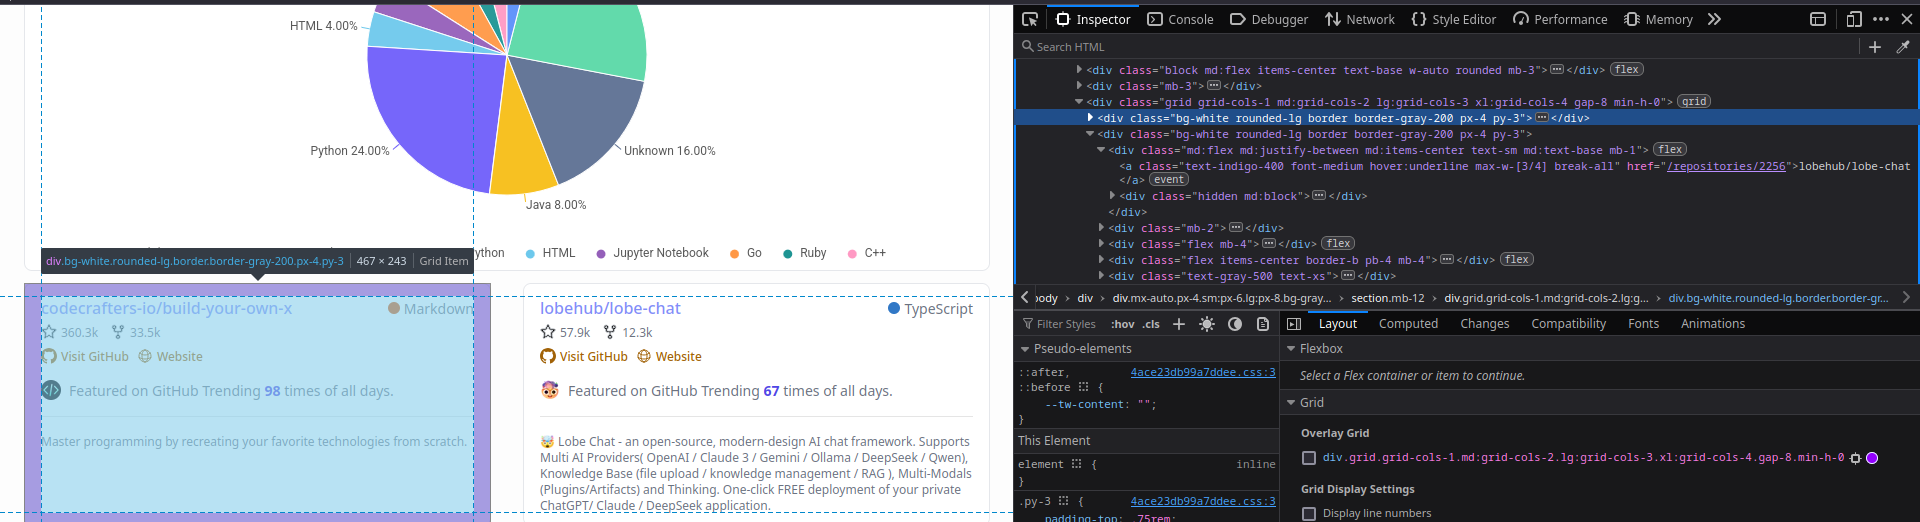

With BeautifulSoup, we will extract all the elements that have this class.

In [ ]:
repo_blocks = soup.find_all("div", class_="bg-white rounded-lg border border-gray-200 px-4 py-3")
repo_blocks[:5]

[<div class="bg-white rounded-lg border border-gray-200 px-4 py-3"><div class="md:flex md:justify-between md:items-center text-sm md:text-base mb-1"><a class="text-indigo-400 font-medium hover:underline max-w-[3/4] break-all" href="/repositories/2841">codecrafters-io/build-your-own-x</a><div class="hidden md:block"><div class="text-gray-500 flex items-center text-xs md:text-sm"><span class="w-[12px] h-[12px] md:w-3 md:h-3 rounded-full mr-1 shrink-0" style="background-color:#DA5B0B"></span>Markdown</div></div></div><div class="mb-2"><div class="flex items-center space-x-3 text-xs text-gray-500"><div class="flex items-center"><svg aria-hidden="true" class="w-4 h-4 mr-1 text-gray-300" stroke="currentColor" viewbox="0 0 16 16"><path d="M8 .25a.75.75 0 0 1 .673.418l1.882 3.815 4.21.612a.75.75 0 0 1 .416 1.279l-3.046 2.97.719 4.192a.751.751 0 0 1-1.088.791L8 12.347l-3.766 1.98a.75.75 0 0 1-1.088-.79l.72-4.194L.818 6.374a.75.75 0 0 1 .416-1.28l4.21-.611L7.327.668A.75.75 0 0 1 8 .25Zm0 2.445L6

We will extract the following details:

- **Repo name**
- **Main language**
- **GitHub link**

In [ ]:
repo_list = []

for block in repo_blocks:
	try:
		# Repo name
		repo_tag = block.find("a", class_="text-indigo-400 font-medium hover:underline max-w-[3/4] break-all")
		repo_name = repo_tag.text.strip()
		repo_link = "https://trendshift.io" + repo_tag["href"]

		# Main language
		lang_tag = block.find("div", class_="text-gray-500 flex items-center text-xs md:text-sm")
		language = lang_tag.text.strip() if lang_tag else "Unknown"

		# Github link
		github_tag = block.find("a", href=True, text="Visit GitHub")
		github_link = github_tag["href"] if github_tag else "N/A"

		repo_info = {
			"name": repo_name,
			"repo_link": repo_link,
			"language": language,
			"github_link": github_link,
		}

		repo_list.append(repo_info)
	
	except Exception as e:
		print(f"Errore nel parsing di un blocco: {e}\n\n")

/tmp/ipykernel_9/3002012763.py:15: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  github_tag = block.find("a", href=True, text="Visit GitHub")


In [10]:
repo_list[0]

{'name': 'codecrafters-io/build-your-own-x',
 'repo_link': 'https://trendshift.io/repositories/2841',
 'language': 'Markdown',
 'github_link': 'https://github.com/codecrafters-io/build-your-own-x'}

Define some utility functions

In [11]:
def save_to_file(path, data):
    file_path = os.path.join(path)
    with open(file_path, 'w') as f:
        for d in data:
            f.write(f'{d}\n')

def read_from_file(path):	
	if os.path.exists(path):
		items = []
		with open(path, 'r') as f:
			lines = f.readlines()
			for line in lines:
				items.append(line.strip())

		return items
	else:
		return []
	
# Funzione per estrarre "owner" e "repo name" da un link GitHub
def parse_github_url(url):
    parts = url.rstrip("/").split("/")
    if len(parts) >= 2:
        return parts[-2], parts[-1]  # Owner, Repo
    return None, None

## Getting the Parameters

For each parameter, we will use a multithreading approach for the requests.

Each thread will make the request and save the result in the `results/project/{parameter}/{repo_name}.txt` file

### Average Issue Resolution Time

The average time it takes to close issues.

A fast resolution time can indicate that the project is actively maintained, with quick responses from the developers. It may also suggest that the community is engaged and responsive, leading to a better user experience and higher satisfaction for contributors and users alike.

In [ ]:
def get_issue_resolution_time(owner, repo):
    url = f"https://api.github.com/repos/{owner}/{repo}/issues"
    params = {"state": "closed", "per_page": 100}
    headers = {"Authorization": f"token {token}"}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code != 200:
        print(f"Errore {response.status_code} per {repo}")
        return None

    issues = response.json()
    resolution_times = []

    for issue in issues:
        if "pull_request" in issue:  # not PR
            continue
        created_at = datetime.strptime(issue["created_at"], "%Y-%m-%dT%H:%M:%SZ")
        closed_at = issue.get("closed_at")
        
        if closed_at:
            closed_at = datetime.strptime(closed_at, "%Y-%m-%dT%H:%M:%SZ")
            resolution_times.append((closed_at - created_at).total_seconds())

    if resolution_times:
        avg_time = np.mean(resolution_times) / 3600  # Converti in ore
        return avg_time
    return None

def process_issue_closing_time(repo):
	owner, repo_name = parse_github_url(repo["github_link"])

	avg_resolution_time = get_issue_resolution_time(owner, repo_name)
		
	save_to_file(f"results/project/resolution_time/{repo_name}.txt", [f"{avg_resolution_time:.2f}"] if avg_resolution_time else [])

# thread pool creation
with ThreadPoolExecutor() as executor:
    executor.map(process_issue_closing_time, repo_list)

### Is AI Related

We will check how many repositories are related to AI by looking for keywords in the repository’s topics or README file.  
If any of the keywords present in the variable `ai_keywords` are found, the repository will be considered AI-related.

Being AI-related can significantly increase a repository's popularity. AI technologies are in high demand and attract a lot of attention.

In [ ]:
def is_ai_repo(owner, repo, token):
	# Controlla i topic del repository per parole chiave legate all'AI
	ai_keywords = [
		"AI", "Artificial Intelligence", "Machine Learning", "Deep Learning", 
		"Neural Networks", "Convolutional Neural Networks (CNN)", "Recurrent Neural Networks (RNN)", 
		"Generative Adversarial Networks (GAN)", "Natural Language Processing (NLP)", "Reinforcement Learning", 
		"Supervised Learning", "Unsupervised Learning", "Semi-supervised Learning", "Transfer Learning", 
		"Feature Engineering", "Gradient Descent", "Backpropagation", "Autoencoders", 
		"Support Vector Machines (SVM)", "Decision Trees", "Random Forests", "K-means", 
		"K-nearest Neighbors (KNN)", "Linear Regression", "Logistic Regression", "Clustering", 
		"Dimensionality Reduction", "Principal Component Analysis", "TensorFlow", "PyTorch", 
		"Keras", "Scikit-learn", "XGBoost", "LightGBM", "spaCy", "Transformers", "BERT", 
		"GPT", "OpenAI", "Reinforcement Learning", "AlphaGo", "Robotics", "Computer Vision", 
		"Speech Recognition", "Image Recognition", "Text Classification", "Named Entity Recognition (NER)", 
		"Object Detection", "Segmentation", "Face Recognition", "Audio Analysis", "Predictive Modeling", 
		"Time Series Forecasting", "Anomaly Detection", "Artificial Neural Networks (ANN)", "Robo-advisors"
	]

	# TOPICS
	url = f"https://api.github.com/repos/{owner}/{repo}/topics"
	headers = {"Authorization": f"token {token}"}
	response = requests.get(url, headers=headers)
	if response.status_code == 200:
		topics = response.json().get("names", [])
		for topic in topics:
			if topic.lower() in ai_keywords:
				return True
	else:
		print(f"Errore nella richiesta per {repo}: {response.status_code}")

	# README
	readme_url = f"https://api.github.com/repos/{owner}/{repo}/readme"
	readme_response = requests.get(readme_url, headers=headers)
	if readme_response.status_code == 200:
		readme_content = readme_response.json().get("content", "")
		for keyword in ai_keywords:
			if keyword.lower() in readme_content.lower():
				return True
			
	return False

def process_is_ai(repo):
	owner, repo_name = parse_github_url(repo["github_link"])
    
	save_to_file(f"results/project/is_ai/{repo_name}.txt", [is_ai_repo(owner, repo_name, token)])

with ThreadPoolExecutor() as executor:  # Puoi aumentare il numero di thread se necessario
    executor.map(process_is_ai, repo_list)

### Watchers Count

The number of watchers indicates how many users are interested in staying updated on a repository's activity.

A high number of watchers could suggest that the repository has significant interest from the community, possibly due to its popularity, relevance, or potential impact.

It may also indicate that the project is frequently updated, with users keen to follow its progress or changes. Conversely, a low number of watchers might suggest a more niche or less actively followed project.

In [ ]:
def get_watch_count(owner, repo, token):
    url = f"https://api.github.com/repos/{owner}/{repo}"
    headers = {'Authorization': f'token {token}'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        repo_data = response.json()
        watchers_count = repo_data.get("watchers_count", 0)
        return watchers_count
    else:
        return None


def process_watchers(repo):
	owner, repo_name = parse_github_url(repo["github_link"])

	print(repo_name)
    
	save_to_file(f"results/project/watchers/{repo_name}.txt", [get_watch_count(owner, repo_name, token)])

with ThreadPoolExecutor() as executor:
    executor.map(process_watchers, repo_list)

### Commit Authors

For the top 30 repositories, we will check if the same people are making commits.

If the same individuals are consistently committing to a repository, it could suggest a highly dedicated team or a single active contributor.

This may indicate a focused project with strong ownership and direction, or potentially a personal or smaller-scale project with limited outside contributions.

In [ ]:
def get_commit_authors(owner, repo, token):
    url = f'https://api.github.com/repos/{owner}/{repo}/commits'
    headers = {'Authorization': f'token {token}'}
    
    params = {'per_page': 100}
    response = requests.get(url, headers=headers, params=params)
    
    authors = []
    if response.status_code == 200:
        commits_data = response.json()
        for commit in commits_data:
            author = commit["commit"]["author"]["name"]  # Usa il nome dell'autore
            authors.append(author)
    else:
        print(f'Error fetching commits for {repo}: {response.status_code}, {response.content}')
    
    return list(authors)

def process_repo(repo, token):
	owner, repo_name = parse_github_url(repo["github_link"])

	commit_authors = get_commit_authors(owner, repo_name, token)

	save_to_file(f'results/project/contributors/{repo_name}.txt', commit_authors)

with ThreadPoolExecutor() as executor:
    executor.map(lambda repo: process_repo(repo, token), repo_list[:30])

### Contributors Count

This refers to the total number of people who have contributed to the repository, including code contributions, issue tracking, and documentation updates.

A higher number of contributors often indicates a collaborative project with a larger, more diverse group of people working together. It can suggest that the repository is well-established, frequently updated, and has a broad user base.

Since we’ve encountered rate limits when accessing the GitHub API, we will use BeautifulSoup to scrape the data for the remaining parameters.

In [ ]:
def get_contributor_count(url):
	headers = {"User-Agent": "Mozilla/5.0"}
	response = requests.get(url, headers=headers)

	page = BeautifulSoup(response.text, "html.parser")

	numbers = [
    	int(span['title']) for span in page.find_all('span', class_='Counter ml-1')
    	if int(span['title']) > 0  
	]

	return numbers[0]


def process_contributors(repo):
	_, repo_name = parse_github_url(repo["github_link"])

	save_to_file(f"results/project/contributors_count/{repo_name}.txt", [get_contributor_count(repo["github_link"])])

with ThreadPoolExecutor() as executor:
    executor.map(process_contributors, repo_list)

### Forks
Forks refer to the number of times a repository has been copied by other users to create their own version.

A high number of forks typically indicates that the repository is highly adaptable and widely used or customized by other developers. It suggests that the project has broad interest, and users may be building upon or modifying it for their own needs.


In [ ]:
# numbers are returned with letters
def convert_to_number(text):
    text = text.strip().lower()
    if text.endswith('k'):
        return int(float(text[:-1]) * 1_000)
    elif text.endswith('m'):
        return int(float(text[:-1]) * 1_000_000)
    elif text.endswith('b'):
        return int(float(text[:-1]) * 1_000_000_000)
    else:
        return None
        
def get_forks_count(url):
	headers = {"User-Agent": "Mozilla/5.0"}
	response = requests.get(url, headers=headers)

	if response.status_code != 200:
		print(f"Errore: {response.status_code}")
		return None

	soup = BeautifulSoup(response.text, "html.parser")

	span = soup.find('span', id='repo-network-counter')

	return convert_to_number(span.text.strip()) if span else None


def process_forks(repo):
	_, repo_name = parse_github_url(repo["github_link"])
    
	print(repo_name)

	save_to_file(f"results/project/forks/{repo_name}.txt", [get_forks_count(repo["github_link"])])

with ThreadPoolExecutor() as executor:
    executor.map(process_forks, repo_list)

## Collect Results

Collect the output from all the `.txt`

In [ ]:
for repo in repo_list:
	_, name = parse_github_url(repo["github_link"])


	repo["contributors"] = read_from_file(f'results/project/commit_authors/{name}.txt')
	repo["resolution_time_avg"] = read_from_file(f'results/project/resolution_time/{name}.txt')
	repo["is_ai"] = read_from_file(f'results/project/is_ai/{name}.txt')
	repo["watchers"] = read_from_file(f'results/project/watchers/{name}.txt')
	repo["contributors_count"] = read_from_file(f'results/project/contributors_count/{name}.txt')
	repo["forks"] = read_from_file(f'results/project/forks/{name}.txt')
    

repo_list = np.array(repo_list)
repo_list[0]

{'name': 'codecrafters-io/build-your-own-x',
 'repo_link': 'https://trendshift.io/repositories/2841',
 'language': 'Markdown',
 'github_link': 'https://github.com/codecrafters-io/build-your-own-x',
 'contributors': ['Paul Kuruvilla',
  'NintenHero',
  'Paul Kuruvilla',
  'Will Squibb',
  'Paul Kuruvilla',
  'Paul Kuruvilla',
  'Paul Kuruvilla',
  'Paul Kuruvilla',
  'Dmitry Dreko',
  'Dmitry Dreko',
  'Paul Kuruvilla',
  'Nicolás Montone',
  'Paul Kuruvilla',
  'João Pedro Lima',
  'Adam Ross',
  'Paul Kuruvilla',
  'João Pedro Lima',
  'Paul Kuruvilla',
  'DanyRenaudier',
  'Paul Kuruvilla',
  'karandeeppotato',
  'Paul Kuruvilla',
  'Aastik',
  'Paul Kuruvilla',
  'erwanvivien',
  'Paul Kuruvilla',
  'Josh Burns',
  'Paul Kuruvilla',
  'Ajay Prem Shankar',
  'Paul Kuruvilla',
  'root',
  'Paul Kuruvilla',
  'Matthew',
  'Paul Kuruvilla',
  'Sarup Banskota',
  'Sarup Banskota',
  'Paul Kuruvilla',
  'sj902',
  'Paul Kuruvilla',
  'Mansur',
  'Gokul2003g',
  'Paul Kuruvilla',
  'Ahmed 

## Normalization

We will transform the values into a standardized format to ensure consistency and make them easier to analyze and represent optimally.

In [ ]:
# from array to real value
def convert_value(entry, is_int, is_ai=False):
    count = entry
    
    if isinstance(count, list) and count:  # Verifica che sia una lista non vuota
        if count[0] == 'None':  # Se il primo valore è la stringa 'None'
            return 0
        try:
            if is_ai:  # Se is_ai è True, trattiamo il valore come booleano (True/False)
                return 1 if count[0] == 'True' else 0
            else:  # Altrimenti trattiamo il valore come numero
                return int(count[0]) if is_int else float(count[0])
        except ValueError:
            return 0  # Se non è convertibile, restituiamo 0
    else:
        return 0  # Se non è una lista o la lista è vuota, restituiamo 0

for entry in repo_list:
    entry['is_ai'] = convert_value(entry['is_ai'], is_int=False, is_ai=True)
    entry['resolution_time_avg'] = convert_value(entry['resolution_time_avg'], is_int=False)
    entry['watchers'] = convert_value(entry['watchers'], is_int=True)
    entry['contributors_count'] = convert_value(entry['contributors_count'], is_int=True)
    entry['forks'] = convert_value(entry['forks'], is_int=True)


repo_list[0]

{'name': 'codecrafters-io/build-your-own-x',
 'repo_link': 'https://trendshift.io/repositories/2841',
 'language': 'Markdown',
 'github_link': 'https://github.com/codecrafters-io/build-your-own-x',
 'contributors': ['Paul Kuruvilla',
  'NintenHero',
  'Paul Kuruvilla',
  'Will Squibb',
  'Paul Kuruvilla',
  'Paul Kuruvilla',
  'Paul Kuruvilla',
  'Paul Kuruvilla',
  'Dmitry Dreko',
  'Dmitry Dreko',
  'Paul Kuruvilla',
  'Nicolás Montone',
  'Paul Kuruvilla',
  'João Pedro Lima',
  'Adam Ross',
  'Paul Kuruvilla',
  'João Pedro Lima',
  'Paul Kuruvilla',
  'DanyRenaudier',
  'Paul Kuruvilla',
  'karandeeppotato',
  'Paul Kuruvilla',
  'Aastik',
  'Paul Kuruvilla',
  'erwanvivien',
  'Paul Kuruvilla',
  'Josh Burns',
  'Paul Kuruvilla',
  'Ajay Prem Shankar',
  'Paul Kuruvilla',
  'root',
  'Paul Kuruvilla',
  'Matthew',
  'Paul Kuruvilla',
  'Sarup Banskota',
  'Sarup Banskota',
  'Paul Kuruvilla',
  'sj902',
  'Paul Kuruvilla',
  'Mansur',
  'Gokul2003g',
  'Paul Kuruvilla',
  'Ahmed 

## Extraction of the Rate of Same Contributors

Now we calculate the rate at which the same contributors are committing to the first 30 repositories. 


In [202]:
for repo in repo_list[:30]:
	contributors_list = repo.get("contributors", [])  
	
	filtered_names = [name for name in contributors_list if not name.endswith("[bot]")] # except bots

	name_counts = pd.Series(filtered_names).value_counts()
	
	repeated_names = name_counts[name_counts > 5].sum()  # minimun of 5 commits
	total_names = len(filtered_names)  

	repo["repeated_committers_ratio"] = repeated_names / total_names  

Convert the data into a pandas DataFrame to simplify the operations.

In [203]:
df = pd.DataFrame(list(repo_list))

df

,name,repo_link,language,github_link,contributors,resolution_time_avg,is_ai,watchers,contributors_count,forks,repeated_committers_ratio
0,codecrafters-io/build-your-own-x,https://trendshift.io/repositories/2841,Markdown,https://github.com/codecrafters-io/build-your-...,"[Paul Kuruvilla, NintenHero, Paul Kuruvilla, W...",52.24,1,359450,120,33500,0.721541
1,lobehub/lobe-chat,https://trendshift.io/repositories/2256,TypeScript,https://github.com/lobehub/lobe-chat,"[lobehubbot, cnJasonZ, lobehubbot, semantic-re...",14.83,1,57837,227,12300,0.932847
2,langgenius/dify,https://trendshift.io/repositories/2152,TypeScript,https://github.com/langgenius/dify,"[诗浓, Jyong, Jyong, crazywoola, Yongtao Huang, ...",3.58,1,83365,702,12400,0.814635
3,practical-tutorials/project-based-learning,https://trendshift.io/repositories/2804,Unknown,https://github.com/practical-tutorials/project...,"[Axel Baudot, Cheese, Rory Donald, Rivaan Rana...",917.80,0,221293,104,28900,0.766667
4,EbookFoundation/free-programming-books,https://trendshift.io/repositories/2657,HTML,https://github.com/EbookFoundation/free-progra...,"[Ivan Oranciuc, Artyom V. Poptsov, Apexq, Migl...",55.15,1,353411,432,63100,0.344060
...,...,...,...,...,...,...,...,...,...,...,...
995,xlang-ai/OSWorld,https://trendshift.io/repositories/9346,Python,https://github.com/xlang-ai/OSWorld,[],0.00,0,0,26,0,NaN
996,adrianhajdin/banking,https://trendshift.io/repositories/9879,TypeScript,https://github.com/adrianhajdin/banking,[],0.00,0,0,2,0,NaN
997,Tencent/HunyuanDiT,https://trendshift.io/repositories/10188,Jupyter Notebook,https://github.com/Tencent/HunyuanDiT,[],0.00,0,0,7,0,NaN
998,hudy9x/namviek,https://trendshift.io/repositories/10303,TypeScript,https://github.com/hudy9x/namviek,[],0.00,0,0,6,0,NaN


Drop the unnecessary columns and add a column to associate the position in the trending list. This will be useful for the charts.

In [204]:
df = df.drop(columns=['name', 'repo_link', 'contributors', 'github_link'])
df['position'] = df.index + 1
df

,language,resolution_time_avg,is_ai,watchers,contributors_count,forks,repeated_committers_ratio,position
0,Markdown,52.24,1,359450,120,33500,0.721541,1
1,TypeScript,14.83,1,57837,227,12300,0.932847,2
2,TypeScript,3.58,1,83365,702,12400,0.814635,3
3,Unknown,917.80,0,221293,104,28900,0.766667,4
4,HTML,55.15,1,353411,432,63100,0.344060,5
...,...,...,...,...,...,...,...,...
995,Python,0.00,0,0,26,0,NaN,996
996,TypeScript,0.00,0,0,2,0,NaN,997
997,Jupyter Notebook,0.00,0,0,7,0,NaN,998
998,TypeScript,0.00,0,0,6,0,NaN,999


In [205]:
df.describe()

,resolution_time_avg,is_ai,watchers,contributors_count,forks,repeated_committers_ratio,position
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,30.000000,1000.000000
mean,323.129950,0.745000,23439.187000,135.769000,3936.700000,0.817482,500.500000
std,759.905229,0.436079,41359.005232,191.868896,8699.186108,0.129425,288.819436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.344060,1.000000
25%,42.467500,0.000000,2754.000000,14.000000,0.000000,0.784513,250.750000
50%,126.125000,1.000000,10682.000000,47.500000,1500.000000,0.856746,500.500000
75%,330.457500,1.000000,27342.750000,182.250000,3700.000000,0.890180,750.250000
max,15881.860000,1.000000,413573.000000,984.000000,79100.000000,0.969786,1000.000000


## Analysis
We visualize the data in order to gain insights into the factors that influence the popularity of repositories.

## Trends  
Let's check if there are any trends in the following parameters:  
- resolution_time_avg  
- watchers  
- contributors_count  
- forks  

We create ranges of 100 positions, within which we will calculate the average of these parameters.

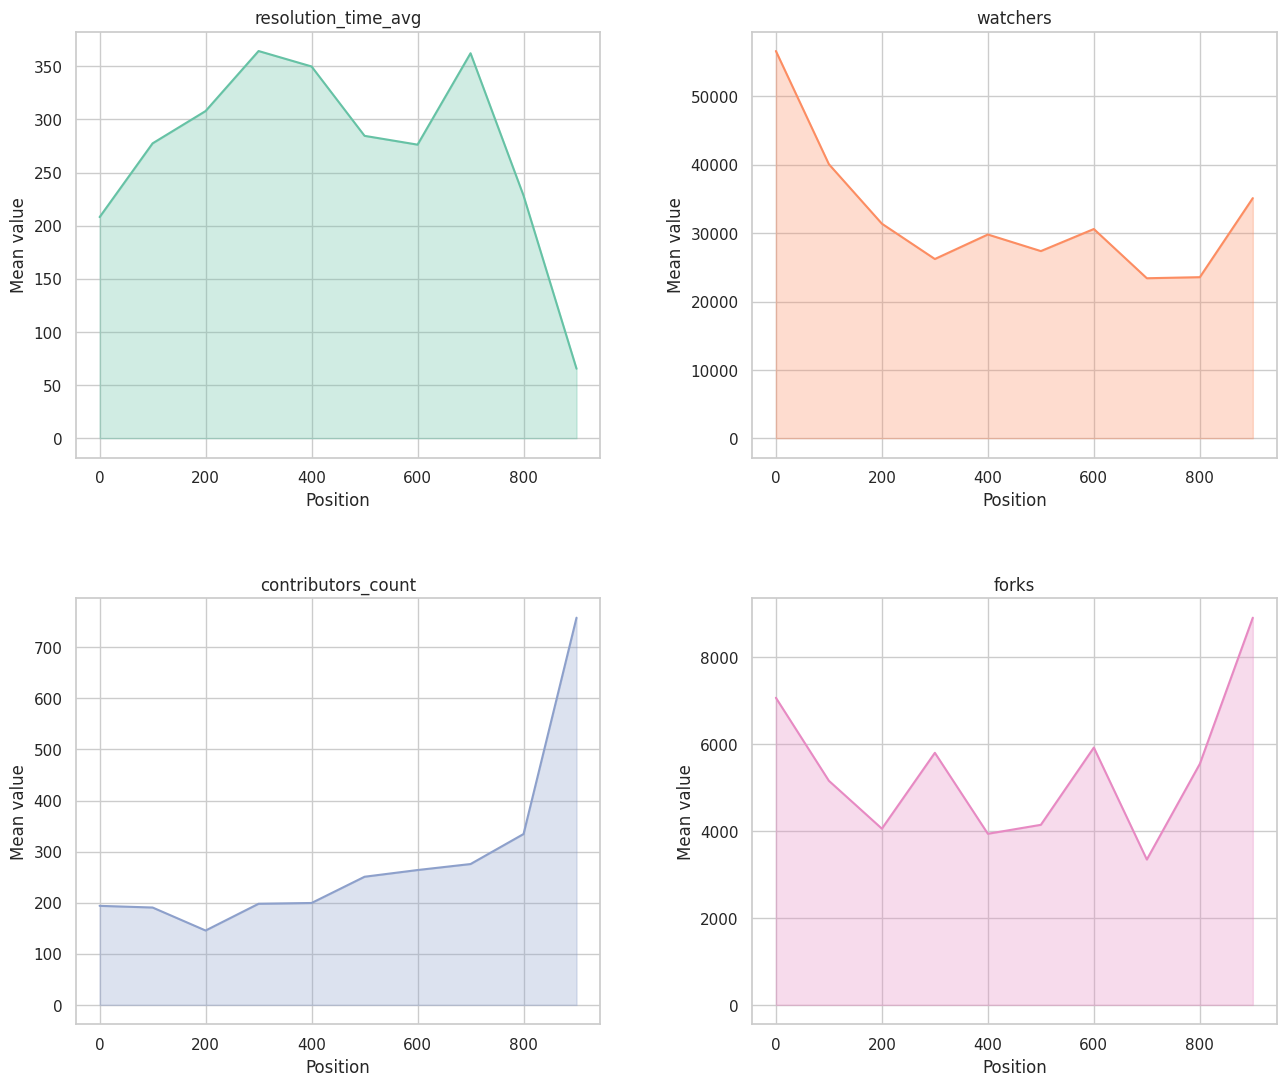

In [211]:
columns_to_plot = ['resolution_time_avg', 'watchers', 'contributors_count', 'forks']
df_filtered = df[columns_to_plot]

for column in columns_to_plot:
    min_value = df_filtered[column].min()
    max_value = df_filtered[column].max()
    df_filtered = df_filtered[(df_filtered[column] != min_value) & (df_filtered[column] != max_value)]

# position range
df_filtered['position_range'] = df_filtered.index.map(lambda position: (position // 100) * 100)

df_grouped = df_filtered.groupby('position_range').mean()

fig, axs = plt.subplots(2, 2, figsize=(14, 12))  
for i, column in enumerate(columns_to_plot):
    row = i // 2  
    col = i % 2   
    
    sns.lineplot(x=df_grouped.index, y=df_grouped[column], ax=axs[row, col], color=sns.color_palette("Set2")[i], legend=False)
    axs[row, col].fill_between(df_grouped.index, df_grouped[column], color=sns.color_palette("Set2")[i], alpha=0.3)  
    axs[row, col].set_xlabel('Position')
    axs[row, col].set_ylabel('Mean value')
    axs[row, col].set_title(f'{column}')
    axs[row, col].grid(True)

plt.tight_layout(pad=4.0)  
plt.show()

valutazione

## Language Popularity  
Let's see which programming languages are the most popular among the top positions.

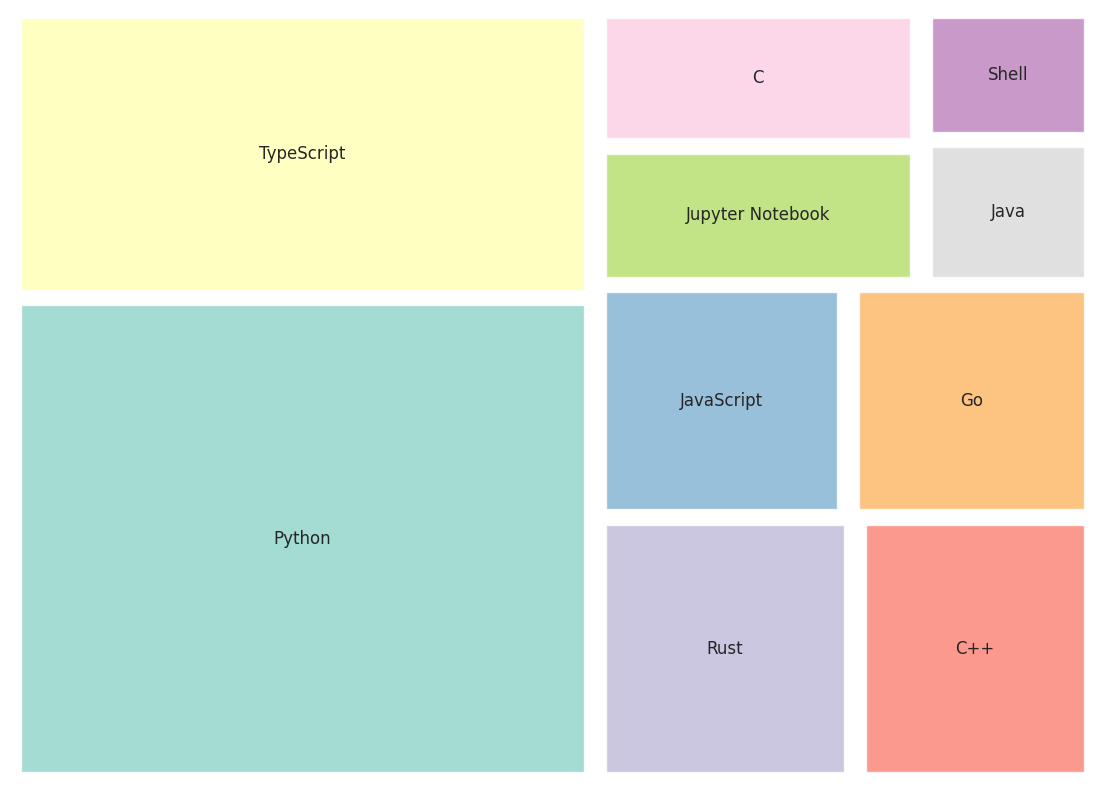

In [219]:
language_popularity = df \
    .groupby('language') \
    .agg({'position': 'sum'}) \
    .reset_index() \
    .sort_values(by='position', ascending=False)

# We consider only those that are at least as frequent as the average occurrence.  
language_popularity = language_popularity[language_popularity['position'] > int(np.mean(language_popularity['position']))]
language_popularity = language_popularity[language_popularity['language'] != 'Unknown']

colors = sns.color_palette("Set3", n_colors=len(language_popularity['language']))
plt.figure(figsize=(14, 10))
squarify.plot(sizes=language_popularity['position'], label=language_popularity['language'], alpha=0.8, color=colors, pad=True)
plt.axis('off')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

valutazione

## AI Factor  
Let's see if being an AI-related project boosts popularity.  

First, let's check how many projects are AI-related.  

/tmp/ipykernel_9/110832473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_ai', y='count', data=data, palette=['skyblue', 'salmon'])


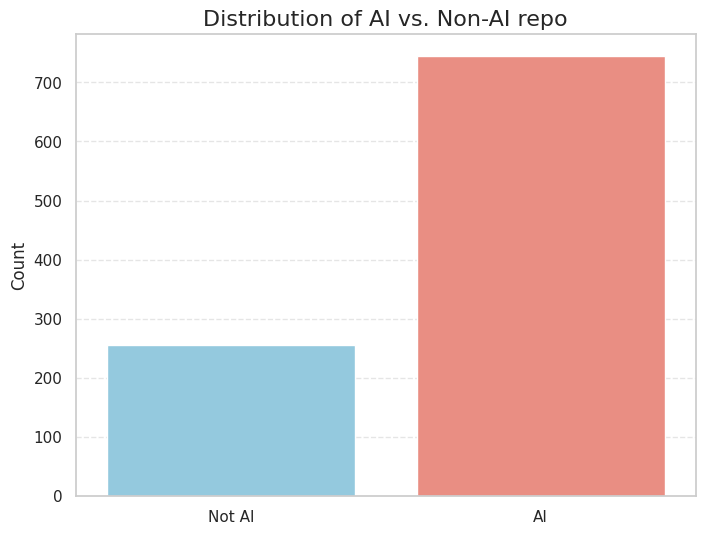

In [213]:
data = df['is_ai'].value_counts().sort_index().reset_index()
data.columns = ['is_ai', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(x='is_ai', y='count', data=data, palette=['skyblue', 'salmon'])

plt.ylabel('Count')
plt.xticks([0, 1], ['Not AI', 'AI'])
plt.title('Distribution of AI vs. Non-AI repo', fontsize=16)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xlabel('')
plt.show()

A significant portion of the projects are AI-related.  

Now, let's see how they are distributed across the position ranges.  

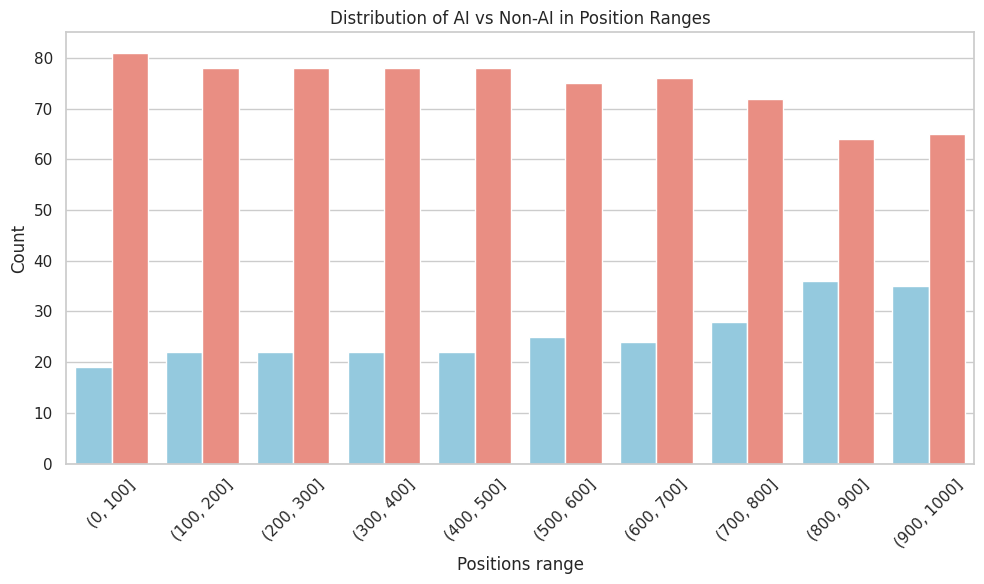

In [197]:
bins = range(0, df['position'].max() + 100, 100)
df['position_bin'] = pd.cut(df['position'], bins)
count_is_ai = df.groupby(['position_bin', 'is_ai']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='position_bin', y='count', hue='is_ai', data=count_is_ai, palette=['skyblue', 'salmon'], legend=False)

plt.xlabel('Positions range')
plt.ylabel('Count')
plt.title('Distribution of AI vs Non-AI in Position Ranges')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We notice that AI-related projects dominate across all position ranges, which is a sign of the current AI trend.  

# 5 Conclusions